In [ ]:
import pandas as pd
import numpy as np

from metrics import print_metrics

from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import ParameterGrid

random_seed = 42

In [2]:
train = pd.read_csv("../data/featured/train.csv", sep=',')
val = pd.read_csv("../data/featured/val.csv", sep=',')

train['date'] = pd.to_datetime(train['date'])

Xtrain = train.drop(columns=['teamA_win'])
ytrain = train['teamA_win']

Xval = val.drop(columns=['teamA_win'])
yval = val['teamA_win']

display(Xtrain.shape, Xval.shape)

(4830, 55)

(209, 55)

In [3]:
min_date = Xtrain['date'].min()
max_date = Xtrain['date'].max()
sample_weight = (Xtrain['date'] - min_date) / (max_date - min_date)

Xtrain = Xtrain.drop(columns=['date'])
Xval = Xval.drop(columns=['date'])

In [6]:
param_grid = {
    'n_estimators': range(15,26),
    'max_depth': range(7,9),
    'min_samples_split': range(4,7),
    'min_samples_leaf': range(1,2)
}

best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    clf = RandomForestClassifier(random_state=random_seed, **params)
    clf.fit(Xtrain, ytrain, sample_weight=sample_weight)
    
    yval_pred = clf.predict(Xval)
    accuracy = accuracy_score(yval, yval_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 18}
Best Validation Accuracy: 0.7559808612440191


Accuracy: 0.7559808612440191
Confusion Matrix:
[[80 21]
 [30 78]]
F1 Score: 0.7536231884057971
Best Threshold (Youden's J statistic): 0.503382444629269


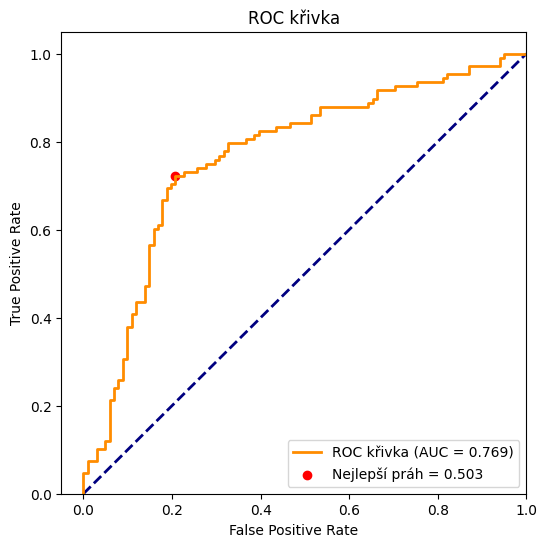

In [7]:
model = RandomForestClassifier(random_state=random_seed, **best_params)
model.fit(Xtrain, ytrain, sample_weight=sample_weight)

yval_pred = model.predict(Xval)
yval_proba = model.predict_proba(Xval)[:, 1]

print_metrics(yval, yval_pred, yval_proba)